In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [7]:
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names

In [8]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_data)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [14]:
pca_scaled = pca.fit_transform(X_scaled)

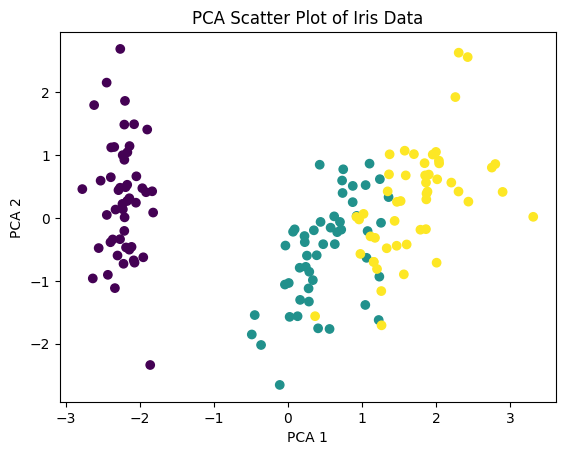

In [15]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=iris.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Scatter Plot of Iris Data')
plt.show()

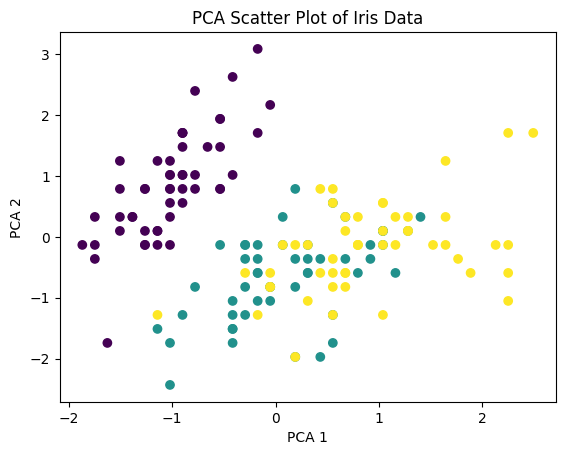

In [16]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.title('PCA Scatter Plot of Iris Data')
plt.show()

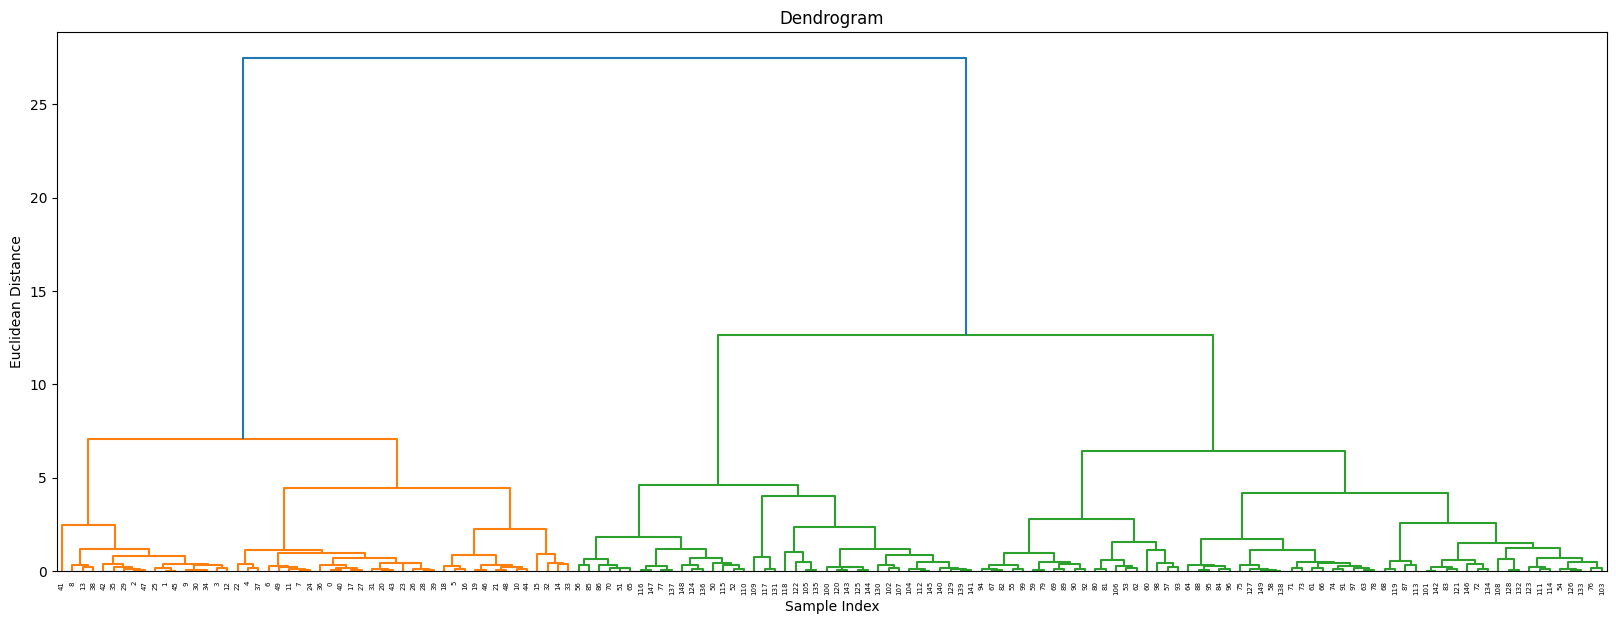

In [ ]:
#Dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 7))
plt.title('Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(pca_scaled, method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [20]:
#agglomerative
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='cosine', linkage='average')
labels = cluster.fit_predict(pca_scaled)

In [21]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

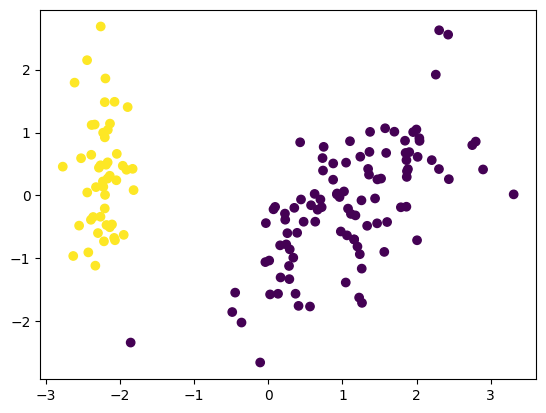

In [22]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_)
